# Outline
1. Discriminative classifiers
2. Logistic regression
3. **Support vector machines**

# Support vector machines
- With logistic regression we used a maximum-likelihood framework to learn the separating hyperplane.
- Let's consider a purely geometric approach...

In [1]:
# setup
%matplotlib inline
import IPython.core.display         # setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats

# Linearly-Separable Data
- For now, assume the training data is _linearly separable_
  - the two classes in the training data can be separated by a line (hyperplane)

In [2]:
# generate random data
X,Y = datasets.samples_generator.make_blobs(n_samples=50, 
         centers=2, cluster_std=2, n_features=2, 
         center_box=[-5,5], random_state=4487)
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#FF0000", "#FFFFFF", "#00FF00"])

lsdatafig = plt.figure()   
plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
axbox = [-10,10,-10,10]
plt.axis(axbox); plt.grid(True);
plt.close()

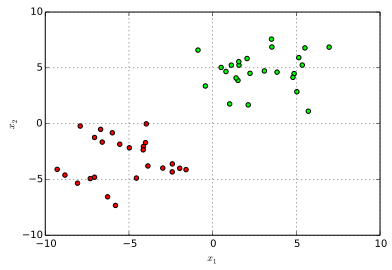

In [3]:
lsdatafig

# Which is the best separating line?
- there are many possible solutions...

In [4]:
def drawplane(w, b=None, c=None, wlabel=None, poscol=None, negcol=None, lw=2, ls='k-'):
    # w^Tx + b = 0
    # w0 x0 + w1 x1 + b = 0
    # x1 = -w0/w1 x0 - b / w1

    # OR
    # w^T (x-c) = 0 = w^Tx - w^Tc  --> b = -w^Tc
    if c != None:
        b = -sum(w*c)
    
    # the line
    if (abs(w[0])>abs(w[1])):   # vertical line
        x0 = array([-30,30])
        x1 = -w[0]/w[1] * x0 - b / w[1]
    else:                       # horizontal line
        x1 = array([-30,30])
        x0 = -w[1]/w[0] * x1 - b / w[0]
    
    # fill positive half-space or neg space
    if (poscol):
        polyx = [x0[0], x0[-1], x0[-1], x0[0]]
        polyy = [x1[0], x1[-1], x1[0], x1[0]]
        plt.fill(polyx, polyy, poscol, alpha=0.2)
    
    if (negcol):
        polyx = [x0[0], x0[-1], x0[0], x0[0]]
        polyy = [x1[0], x1[-1], x1[-1], x1[0]]
        plt.fill(polyx, polyy, negcol, alpha=0.2)
        
    # plot line
    lineplt, = plt.plot(x0, x1, ls, lw=lw)

    # the w
    if (wlabel):
        xp = array([0, -b/w[1]])
        xpw = xp+w
        plt.arrow(xp[0], xp[1], w[0], w[1], width=0.01)
        plt.text(xpw[0]-0.5, xpw[1], wlabel)
    return lineplt

In [5]:
seplinefig = plt.figure()
ws = array([[1,0.1], [0.1,1], [1,1.5], [1.5,1]])
bs = array([0.9, -1, 2, 2.5])

for i in range(len(bs)):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
    drawplane(ws[i,:], bs[i], poscol='g', negcol='r')
    plt.axis(axbox); plt.grid(True)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])    
    
plt.close()

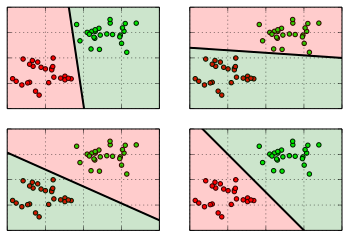

In [6]:
seplinefig

# Maximum margin
- Define the space between the separating line and the closest point as the _margin_.
  - think of this space as the "amount of wiggle room" for accomodating errors in estimating $w$. 

In [7]:
def drawmargin(w,b,xmarg=None):
    wnorm = w / sqrt(sum(w**2))
    if xmarg == None:
        # calculate a point on the margin
        dm = 1 / sqrt(sum(w**2))
        xpt  = array([1,-w[0]/w[1]-b/w[1]])
        # then find the margin (assuming learned with SVM)
        xmarg = xpt + dm*wnorm
        xmarg2 = xpt - dm*wnorm
    else:
        # find the distance to the margin
        dm = (sum(w*xmarg)+b) / sqrt(sum(w**2))
        # move to the other side of the decision plane
        xmarg2 = xmarg - 2*dm*wnorm

    lin = drawplane(w, c=xmarg, ls='k--', lw=1)
    drawplane(w, c=xmarg2, ls='k--', lw=1)
    return lin

In [8]:
w = array([1.5,1])
b = 2.5

# calculate distance to margin
d = abs(dot(X,w.T) + b)
mmi = argmin(d)
x0 = X[mmi,:]

margfig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
l1 = drawplane(w, b, poscol='g', negcol='r')
plt.plot(x0[0], x0[1], 'ko', fillstyle='none', markeredgewidth=2)
l2 = drawmargin(w,b,x0)
plt.axis(axbox); plt.grid(True)    
leg = plt.legend((l1,l2), ('boundary', 'margin'), loc='lower right' ,fontsize=10)
leg.get_frame().set_facecolor('white') 
plt.annotate(s='margin point', xy=x0, xytext=(-9.5,1.0), 
             arrowprops=dict(facecolor='black', width=2, shrink=0.2, headwidth=6))
plt.close()

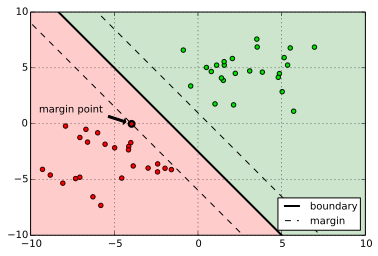

In [9]:
margfig

- **Idea:** the best separating line is the one that _maximizes the margin_.
  - i.e., puts the most distance between the closest points and the decision boundary.

In [10]:
margfigs = plt.figure()
for i in range(len(bs)):
    w = ws[i,:]
    b = bs[i]
    d = abs(dot(X,w.T) + b)
    mmi = argmin(d)
    x0 = X[mmi,:]

    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
    drawplane(w, b, poscol='g', negcol='r')
    drawmargin(w, b, x0)
    plt.axis(axbox); plt.grid(True)
    
plt.close()

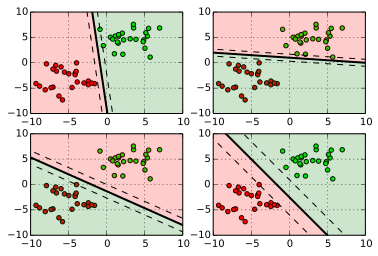

In [11]:
margfigs

- _the solution..._
  - by symmetry, there should be at least one margin point on each side of the boundary
  - the points on the margins are called the **support vectors**
    - the points support (define) the margin

In [12]:
# fit SVM (kernel is the type of decision surface...more in the next lecture)
clf = svm.SVC(kernel='linear', C=inf)
clf.fit(X, Y)
# get line parameters
w = clf.coef_[0]
b = clf.intercept_[0]

maxmfig = plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
l1 = drawplane(w, b, poscol='g', negcol='r')
l2 = drawmargin(w, b)
l3, = plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
         'ko',fillstyle='none', markeredgewidth=2)
plt.axis(axbox); plt.grid(True)
leg = plt.legend((l1,l2,l3), ('boundary', 'margin', 'support vectors'), 
           loc='lower right', fontsize=10)
leg.get_frame().set_facecolor('white') 
plt.close()

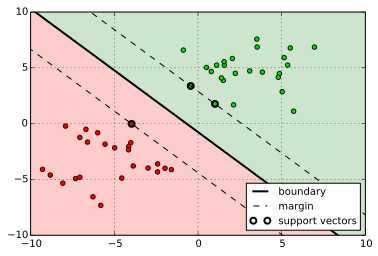

In [13]:
maxmfig

# SVM Training
- given a training set $\{x_i,y_i\}_{i=1}^N$, optimize:
  $$ \mathop{\mathrm{argmin}}_{w,b} \frac{1}{2} w^Tw\\\mathrm{s.t.}~y_i(w^Tx_i+b)\geq 1,\quad 1\leq i \leq N$$
  - the objective minimizes the inverse of the margin distance, i.e., maximizes the margin.
  - the inequality constraints ensure that all points are either on or outside of the margin.

# SVM Prediction
- given a new data point $x_*$, use sign of linear function to predict class
    - $y_* = \mathop{\mathrm{sign}}(w^T x_* + b)$

# Why is maximizing the margin good?
- the true $w$ is uncertain
  - maximizing the margin allows the most uncertainty (wiggle room) for $w$, while keeping all the points correctly classified.

In [14]:
maxmfigw = plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
l1 = drawplane(w, b, poscol='g', negcol='r')
l2 = drawmargin(w, b)
l3, = plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
         'ko',fillstyle='none', markeredgewidth=2)

for i in range(10):
    w2 = w + 0.05*random.standard_normal(w.shape)
    b2 = b + 0.2*random.standard_normal(b.shape)
    drawplane(w2, b2, lw=0.5, ls='b-')
    
plt.axis(axbox); plt.grid(True)
plt.close()

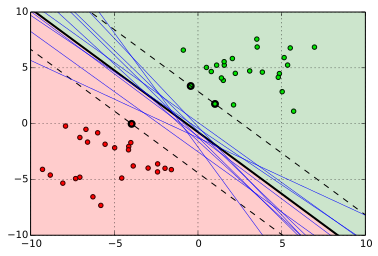

In [15]:
maxmfigw

- the data points are uncertain
  - maximizing the margin allows the most wiggle of the points, while keeping all the points correctly classified.

In [16]:
maxmfigp = plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
l1 = drawplane(w, b, poscol='g', negcol='r')
l2 = drawmargin(w, b)
l3, = plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
         'ko',fillstyle='none', markeredgewidth=2)

plt.scatter(X[:,0], X[:,1], s=500, alpha=0.5, color='gray')

plt.axis(axbox); plt.grid(True)
plt.close()

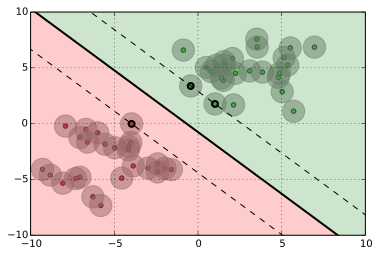

In [17]:
maxmfigp

# What about non-separable data?
- use the same linear classifier
  - allow some training samples to violate margin
    - i.e., are inside the margin (or even mis-classified)
  - introduce a parameter $C$ which is the penalty for each training sample that violates the margin.
    - smaller value means allow more violations (less penalty)
    - larger value means don't allow violations (more penalty)

In [18]:
# generate non-separable random data
X,Y = datasets.samples_generator.make_blobs(n_samples=50, 
         centers=2, cluster_std=3.5, n_features=2, 
         center_box=[-5,5], random_state=4487)

Cs = [0.01, 0.1, 1, 10]
Cmargfigs = plt.figure()

for i in range(len(Cs)):
    # fit SVM
    clf = svm.SVC(kernel='linear', C=Cs[i])
    clf.fit(X, Y)
    # get line parameters
    w = clf.coef_[0]
    b = clf.intercept_[0]

    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap)
    drawplane(w, b, poscol='g', negcol='r')
    drawmargin(w, b)
    plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
             'ko',fillstyle='none', markeredgewidth=1.5)
    plt.axis(axbox); plt.grid(True)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.title("C="+str(Cs[i]))
    
plt.close()

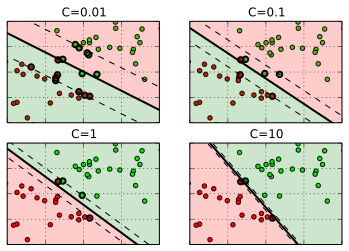

In [19]:
Cmargfigs

# Example: Iris Data

In [20]:
# define class labels, plot markers, and feature labels
markers   = ('ro', 'gs'); lines = ('r-', 'g-')
featnames = ("petal length", "sepal width")
xr = [ arange(2.5,7,0.05) , arange(1.5, 4, 0.05) ]
axbox = [2.5, 7, 1.5, 4]

# load iris dataset from scikit-learn
iris = datasets.load_iris()    

# get the indices of the 2 classes of interest.
inds = squeeze( (iris.target==1) | (iris.target==2) )

# get the targets
target     = iris.target[inds]
classnums  = unique(target)
classnames = ('versicolor (1)', 'virginica (2)')
# make a colormap for viewing classes
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#FF0000", "#FFFFFF", "#00FF00"])

# extract the data (each row is a sample)
# inds extracts rows, while
#  (2,1) extracts the two dimensions
# ix_ is a magic function to select a subarray
data = iris.data[ix_(inds, (2,1))]
print data.shape

(100, 2)


In [21]:
# randomly split data into 50% train and 50% test set
trainX, testX, trainY, testY = \
  cross_validation.train_test_split(data, target, 
  train_size=0.5, test_size=0.5, random_state=4487)

print trainX.shape
print testX.shape

(50, 2)
(50, 2)


- SVM doesn't it's own dedicated cross-validation function, so use the built-in function `cross_val_score`

In [22]:
# values of C to try
Cs = logspace(-3,3,13)
print "Cs =", Cs

avgscores = empty(Cs.shape)
for i,C in enumerate(Cs):
    # create the SVM classifier
    # kernel specifies the type of function to learn
    #  (more in next lecture)
    clf = svm.SVC(kernel='linear', C=C)
    
    # calculate the scores for this classifier
    myscore = cross_validation.cross_val_score(clf, trainX, trainY, 
                                               cv=5)
    
    # record the average score
    avgscores[i] = mean(myscore)

# pick the best C
besti = argmax(avgscores)
bestC = Cs[besti]
print "bestC =", bestC

Cs = [  1.00000000e-03   3.16227766e-03   1.00000000e-02   3.16227766e-02
   1.00000000e-01   3.16227766e-01   1.00000000e+00   3.16227766e+00
   1.00000000e+01   3.16227766e+01   1.00000000e+02   3.16227766e+02
   1.00000000e+03]
bestC = 0.316227766017


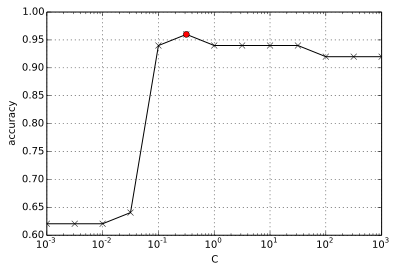

In [23]:
# plot
plt.figure()
plt.semilogx(Cs, avgscores, 'kx-')
plt.semilogx(bestC, avgscores[besti], 'ro')
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)

In [24]:
# fit the SVM using all the data and the best C   
clf = svm.SVC(kernel='linear', C=bestC)
clf.fit(trainX, trainY)

# get line parameters
w = clf.coef_[0]
b = clf.intercept_[0]
print w
print b

[ 1.72848562  0.49333127]
-9.73975578734


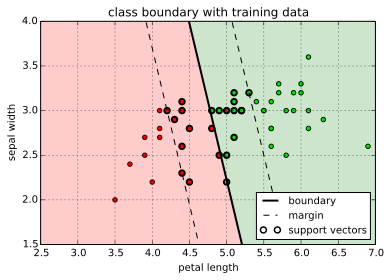

In [25]:
plt.figure()
plt.scatter(trainX[:,0], trainX[:,1], c=trainY, cmap=mycmap)
l1 = drawplane(w, b, poscol='g', negcol='r')
l2 = drawmargin(w, b)
l3, = plt.plot(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
             'ko',fillstyle='none', markeredgewidth=1.5)
plt.axis([2.5, 7, 1.5, 4]); plt.grid(True);
plt.xlabel(featnames[0]); plt.ylabel(featnames[1])

leg = plt.legend((l1,l2,l3), ('boundary', 'margin', 'support vectors'), 
           loc='lower right', fontsize=10)
leg.get_frame().set_facecolor('white') 
plt.title('class boundary with training data');

In [26]:
# predict from the model
predY = clf.predict(testX)

# calculate accuracy
Ncorrect = sum(testY==predY)
acc      = mean(testY==predY)
print "number correct =", Ncorrect
print "test accuracy =", acc

number correct = 44
test accuracy = 0.88


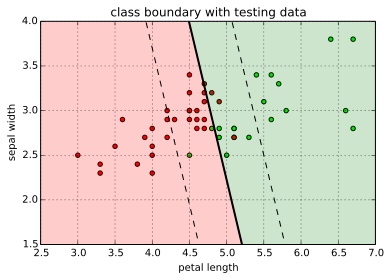

In [28]:
plt.figure()
plt.scatter(testX[:,0], testX[:,1], c=testY, cmap=mycmap)
l1 = drawplane(w, b, poscol='g', negcol='r')
l2 = drawmargin(w, b)
plt.axis([2.5, 7, 1.5, 4]); plt.grid(True);
plt.xlabel(featnames[0]); plt.ylabel(featnames[1])
plt.title('class boundary with testing data');

# SVM Summary
- **Classifier:**
  - linear function $f(x) = w^Tx + b$
  - given new sample $x_*$, predict $y_* = \mathrm{sign}(w^Tx_*+b)$.
- **Training:**
  - Maximize the margin of the training data.
    - i.e., maximize the separation between the points and the decision boundary.
  - Allow some training samples to violate the margin.
    - Use cross-validation to pick the hyperparameter $C$.

# Summary
- **Linear classifiers:**
  - separate the data using a linear surface (hyperplane).
  - $y = \mathrm{sign}(w^Tx + b)$
- **Two formulations:**
  - logistic regression - maximize the probability of the data
  - support vector machine - maximize the margin of the hyperplane

- **Advantages:**
  - SVM works well on high-dimensional features ($d$ large), and has low generalization error.
  - LR has well-calibrated probabilities.
- **Disadvantages:**
  - decision surface can only be linear! 
    - Next lecture we will see how to deal with non-linear decision surfaces.